In [1]:
from src import Utilities as U
from src import Metrics as M
from src import Viz as V

df = U.load_and_clean("Data/health_study_dataset.csv")
cols = ["age", "weight", "height", "systolic_bp", "cholesterol"]
stats_df = M.colums_description(df, cols)
stats_df_rounded = stats_df.round(2)
print(stats_df_rounded)
p_real = M.proportion_of_disease(df)
p_sim = M.sample_disease(df, n=1000, seed=42)
diff, rel_diff = M.compare_disease(p_real, p_sim)
lower,upper,boot_means = M.bootstrap(df,B=5000)
t_stat, p_val, t_stat_w, p_val_w = M.smoker_t_test(df)





print("\n------------------------------------\n")
print("Verklig andel sjukdom:", p_real)
print("Simulerad andel sjukdom:", p_sim)
print("Skillnad mellan verklig och simulerad",f"{rel_diff:.2f}%")
print("Bootstrap 95% CI för Systoliskt blodtryck:", (round(float(lower), 1), round(float(upper), 1)))
print(f"Standard t-test: T = {t_stat:.3f}, P = {p_val:.4f}")
print(f"Welch t-test:    T = {t_stat_w:.3f}, P = {p_val_w:.4f}")


               mean  median    min     max
age           49.43   50.00   18.0   90.00
weight        73.41   73.20   33.7  114.40
height       171.85  171.35  144.4  200.40
systolic_bp  149.18  149.40  106.8  185.90
cholesterol    4.93    4.97    2.5    7.88

------------------------------------

Verklig andel sjukdom: 0.05875
Simulerad andel sjukdom: 0.063
Skillnad mellan verklig och simulerad 7.23%
Bootstrap 95% CI för Systoliskt blodtryck: (148.3, 150.1)
Standard t-test: T = 0.461, P = 0.6450
Welch t-test:    T = 0.450, P = 0.6527


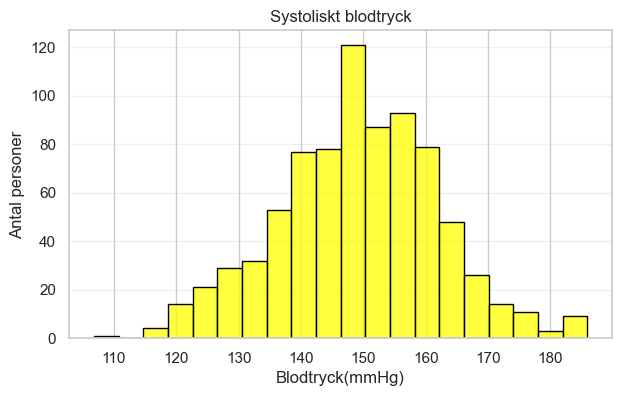

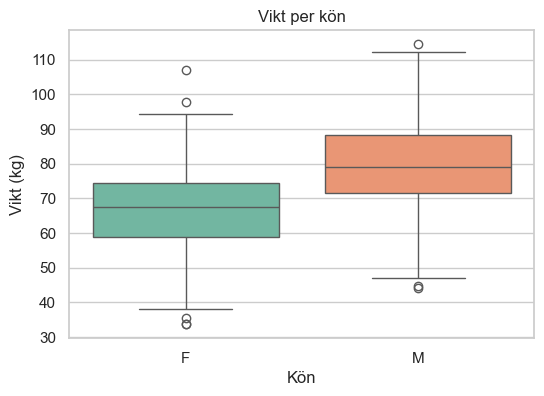

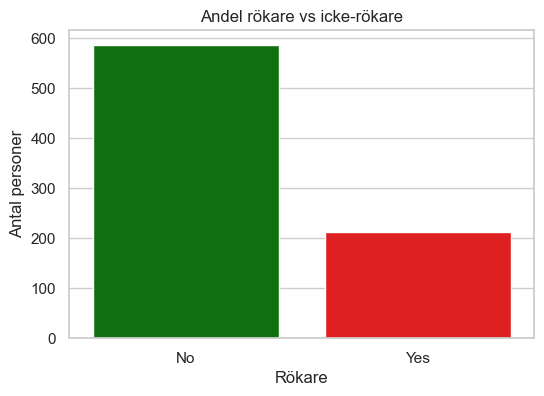

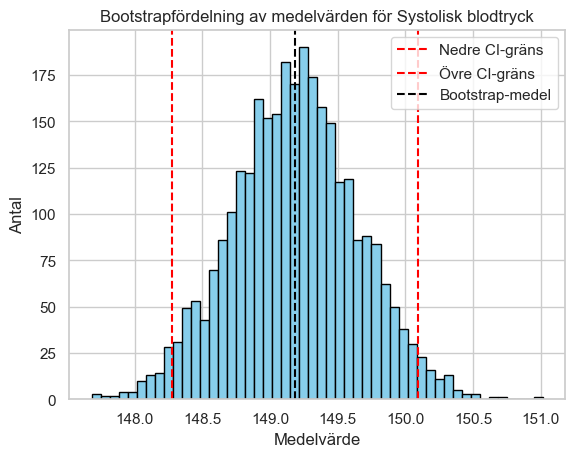

In [2]:
(V.plots(df))